In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
# -값이 깨지는 문제 해결을 위해 파라미터값 설정    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [3]:
os.listdir('../data/생활체육/')

['건강생활실천율_시도_시_군_구__20221206110557.xlsx',
 '서울시_공공체육시설_2010-2021.xlsx',
 '신고·등록+체육시설_2010-2021_서울시.xlsx',
 '인구_십만명당_체육시설수_시도__20221206110635.xlsx',
 '중등도+신체활동+실천율_20221206110838.xlsx']

In [104]:
path = '../data/생활체육/'

# 생활체육

## 건강생활실천율

In [105]:
file = pd.read_excel(path + '건강생활실천율_시도_시_군_구__20221206110557.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [106]:
file = file.astype({'시점' :str})
file.set_index('시점', inplace=True)

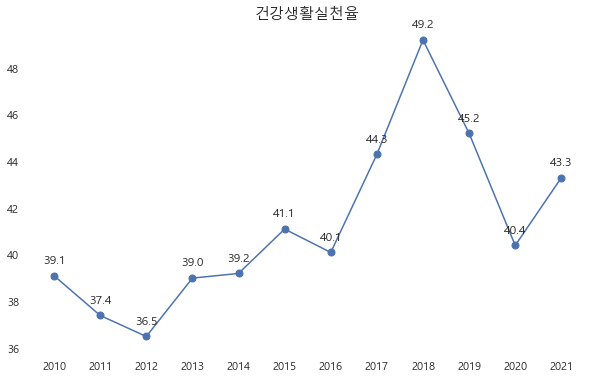

In [109]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(list(file.index), file['서울특별시'], marker='o', markersize = 7)

for i, v in enumerate(file['서울특별시']):
    plt.text(i, v+0.5, v, ha='center')

plt.title('건강생활실천율', fontsize = 15)
plt.show()

## 서울시 공공체육시설

In [126]:
file = pd.read_excel(path + '서울시_공공체육시설_2010-2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [127]:
# file

In [128]:
# file.replace({'-':np.nan}, inplace=True)

In [129]:
# file.loc[4, '육상경기장':].sum()

In [130]:
file.drop([0, 1], axis = 0, inplace=True)
file = file.astype({'시점': str})

In [131]:
df = file.loc[:, ['시점', '합계']]
df.set_index('시점', inplace=True)

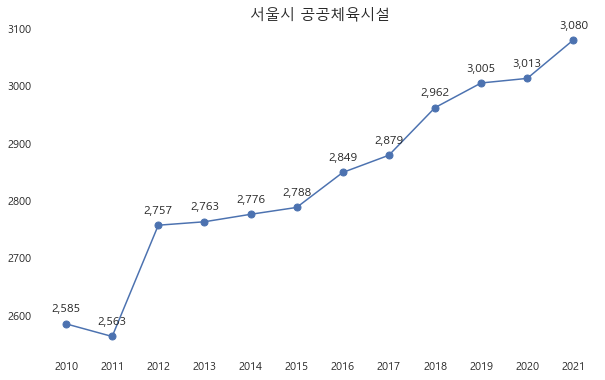

In [132]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(df.index, df['합계'], marker = 'o', markersize= 7)
for i, v in enumerate(df['합계']):
    plt.text(i, v+20, format(int(v), ','), ha='center')

plt.title('서울시 공공체육시설', fontsize = 15)
plt.show()

## 신고 및 등록 체육시설

In [133]:
file = pd.read_excel(path + '신고·등록+체육시설_2010-2021_서울시.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [134]:
df = file.loc[3:, ['시점', '체육시설']]
df = df.astype({'시점' : str, '체육시설' : int})
df.head()

,시점,체육시설
3,2010,11353
4,2011,11774
5,2012,11519
6,2013,10701
7,2014,10424


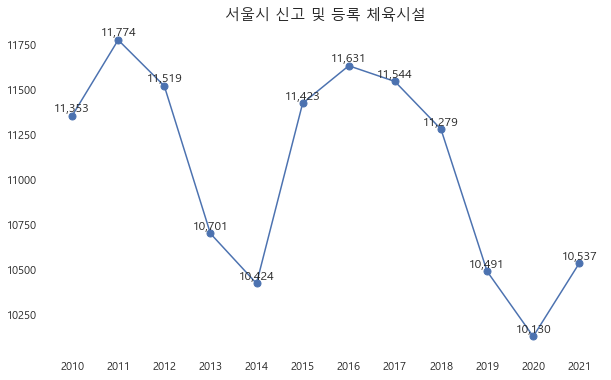

In [135]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(df['시점'], df['체육시설'], marker = 'o', markersize= 7)
for i, v in enumerate(df['체육시설']):
    plt.text(i, v+20, format(int(v), ','), ha='center')

plt.title('서울시 신고 및 등록 체육시설', fontsize = 15)
plt.show()

## 인구 10만명당 체육시설
- 주민등록인구 기준

In [136]:
file = pd.read_excel(path + '인구_십만명당_체육시설수_시도__20221206110635.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [137]:
df = file.copy()
df.columns = df.loc[0, :]
df.drop(0, axis = 0, inplace=True)
df = df.astype({'시점' : str})

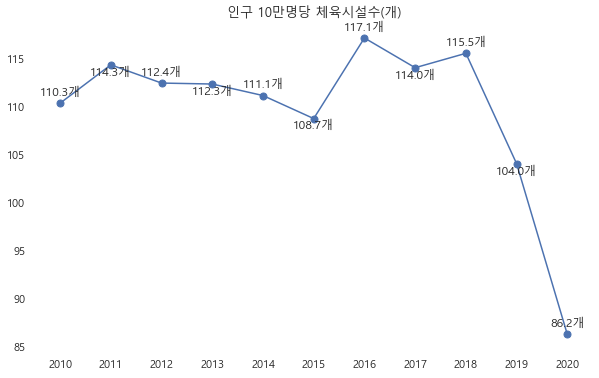

In [138]:
fig, ax = plt.subplots(figsize= (10,6))
ax.set_facecolor('white')

ax = plt.plot(df['시점'], df['인구십만명당 체육시설수(A÷B×100,000) (개)'], marker = 'o', markersize = 7)
for i, v in enumerate(df['인구십만명당 체육시설수(A÷B×100,000) (개)']):
    if i%2 == 0:
        plt.text(i, v+0.8, str(v) +'개', ha='center')
    else:
        plt.text(i, v-1.1, str(v) +'개', ha='center')

plt.title('인구 10만명당 체육시설수(개)', fontsize = 13)
plt.show()

## 중등도 신체활동 실천율

In [139]:
file = pd.read_excel(path + '중등도+신체활동+실천율_20221206110838.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [140]:
df = file[file['구분별(2)']=='소계']
df=df.astype({"시점":str})
df.drop(['구분별(1)','구분별(2)'], axis = 1, inplace=True)

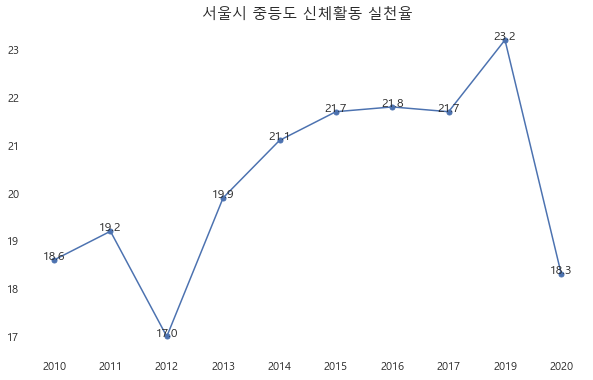

In [141]:
fig, ax = plt.subplots(figsize= (10,6))
ax.set_facecolor('white')

ax = plt.plot(df['시점'], df['전체'], marker ='o', markersize = 5)
for i, v in enumerate(df['전체']):
    plt.text(i, v, v, ha = 'center')
    
plt.title('서울시 중등도 신체활동 실천율', fontsize = 15)
plt.show()

# 통신데이터

In [142]:
path = '../data/통신데이터/'
os.listdir('../data/통신데이터/')

['~$가구_인터넷_접속_여부_인터넷_접속률__20221206111334.xlsx',
 '가구_인터넷_접속_여부_인터넷_접속률__20221206111334.xlsx',
 '인터넷_이용자수_20221206111506.xlsx']

## 인터넷 접속여부 인터넷 접속률

In [143]:
file = pd.read_excel(path + '가구_인터넷_접속_여부_인터넷_접속률__20221206111334.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [144]:
file
file = file.astype({"시점" : str})
file.head()

,특성별(1),특성별(2),시점,가능,불가능
0,지역별,서울,2010,88.4,11.6
1,지역별,서울,2011,88.6,11.4
2,지역별,서울,2012,88.9,11.1
3,지역별,서울,2013,99.5,0.5
4,지역별,서울,2014,99.6,0.4


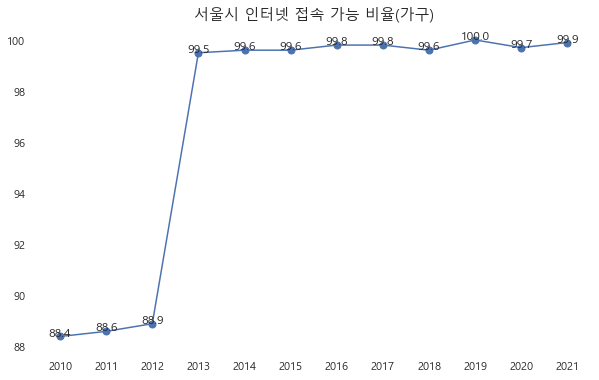

In [145]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(file['시점'], file['가능'],marker ='o', markersize = 7)
for i, v in enumerate(file['가능']):
    plt.text(i, v, v, ha = 'center')
    
plt.title("서울시 인터넷 접속 가능 비율(가구)", fontsize = 15)
plt.show()

## 인터넷 이용자수

In [146]:
file = pd.read_excel(path + '인터넷_이용자수_20221206111506.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [147]:
file.drop(0, axis = 0, inplace=True)
file

,시점,지역별
1,2011,7910.0
2,2012,7930.0
3,2013,8100.0
4,2014,8400.0
5,2015,8328.0
6,2016,8419.0
7,2017,8649.0
8,2018,8686.0
9,2019,8736.0
10,2020,8746.0


In [148]:
file = file.astype({'시점' : str})

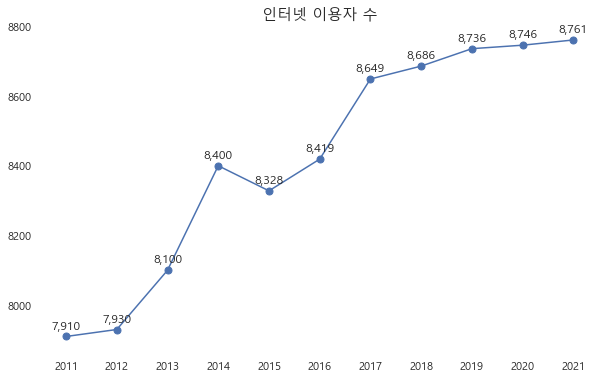

In [149]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(file['시점'], file['지역별'],marker ='o', markersize = 7)
for i, v in enumerate(file['지역별']):
    plt.text(i, v+20, format(int(v), ','), ha = 'center')
    
plt.title("인터넷 이용자 수", fontsize = 15)
plt.show()